# Attendance Record

#### Stage 1: Import relevant modules

In [1]:
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

#### Stage 2: Get relevant data from CWDatabase.db and format it to a list.

In [2]:
class ReadSQL:
    def __init__(self, database):
        self.database = database
        self.conn = sqlite3.connect(self.database)
        self.cur = self.conn.cursor()

    def queryColumnsToDataframe(self, studentID, modules, tables):
        dfs = []
        for i in range(len(modules)):
            sub_query1 = 'SELECT Week, ROUND(CAST(SUM(' + studentID + ')'
            sub_query2 = ' AS REAL)/COUNT(Week) * 100, 2) AS ' + modules[i]
            sub_query3 = ' FROM ' + tables[i][0] + ' a INNER JOIN ' + tables[i][1] + ' b'
            sub_query4 = ' ON a.Session_Number = b.Session_Number' + ' GROUP BY Week'
            query = sub_query1 + sub_query2 + sub_query3 + sub_query4
            # print(query)
            try:
                df = pd.read_sql_query(query, self.conn)
                dfs.append(df)
            except Exception as Error:
                print('This ID does not exist in the database please try again.')
        df = pd.concat(dfs, join = 'outer', axis = 1, sort = False)
        # print(dfs)
        return df

    def formatDataframe(self, df):
        df.drop('Week', axis = 1, inplace = True) # drop duplicate week columns
        weekNum = df.index + 1
        df.insert(loc = 0, column = 'WeekNo', value = weekNum) # insert new week column at the start
        df.rename(
            columns = {
                'COA111':'COA111 (%)', 
                'COA122':'COA122 (%)'
            },
            inplace = True
        )
        return df

    def closeDatabase():
        self.conn.close()
        return

sid = str(input('Please enter a student ID i.e., \'Student123\': '))
sid = sid.strip()

test = ReadSQL('CWDatabase.db')
modules = ['COA111', 'COA122']
sessions = [['COA111Sessions', 'COA111Transposed'], ['COA122Sessions', 'COA122Transposed']]

df = test.queryColumnsToDataframe(sid, modules, sessions)
weeklyAttendance = test.formatDataframe(df)


#### Stage 3: Plot graph based on given student ID.

The weekly attendance record of Student ID 0:
   WeekNo  COA111 (%)  COA122 (%)
0       1       100.0       66.67
1       2        50.0       33.33
2       3       100.0        0.00
3       4        50.0       25.00
4       5         0.0       33.33
5       6         NaN        0.00


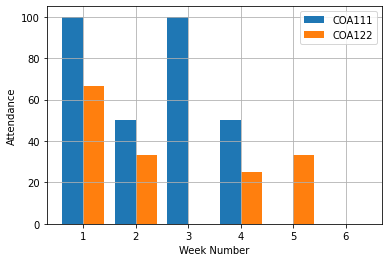

None


In [15]:
week = np.array(weeklyAttendance['WeekNo'])

plt.bar(week- 0.2, weeklyAttendance['COA111 (%)'], width = 0.4, label = 'COA111') # w/o specifying colour
plt.bar(week + 0.2, weeklyAttendance['COA122 (%)'], width = 0.4, label = 'COA122')
plt.xlabel('Week Number')
plt.ylabel('Attendance')

# show the legend, grid and plot
plt.legend(loc = 'upper right')
plt.grid()

print('The weekly attendance record of Student ID %s:'%sid[7:])
print(weeklyAttendance)
print(plt.show())


#### Stage 4: Display list and graph to user. 

In [7]:
# 1.3 https://stackoverflow.com/questions/28075699/coloring-cells-in-pandas

The weekly attendance record of Student ID 0:
   WeekNo  COA111 (%)  COA122 (%)
0       1       100.0       66.67
1       2        50.0       33.33
2       3       100.0        0.00
3       4        50.0       25.00
4       5         0.0       33.33
5       6         NaN        0.00 None
